# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [2]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
linha = arquivo.readline()
data_mensal = []
temperatura_mensal = []
for linha in arquivo:
    if linha[0] != '%':
        a = linha.split()
        if a != []:
            linha_float = []
            for i in a:
                if i != 'NaN':
                    f = float(i)
                    linha_float.append(f)
            if len(linha_float) > 2: 
                dat = []
                for i in range(2):
                    dat.append(linha_float[i])
                data_certa = dat[0] + (dat[1]/12)
                data_mensal.append(data_certa)
                temperatura_mensal.append(linha_float[2] + 24.01)

In [3]:
len(temperatura_mensal)

2096

In [4]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
linha = arquivo.readline()
data_anual = []
temperatura_anual = []
for linha in arquivo:
    if linha[0] != '%':
        a = linha.split()
        if a != []:
            linha_float = []
            for i in a:
                if i != 'NaN':
                    f = float(i)
                    linha_float.append(f)
            if len(linha_float) > 4: 
                dat = []
                for i in range(2):
                    dat.append(linha_float[i])
                data_certa = dat[0] + (dat[1]/12)
                data_anual.append(data_certa)
                temperatura_anual.append(linha_float[4] + 24.01)

In [ ]:
if 

In [11]:
t = teste.split()
print(t)

['1855', '12', '-1.397', '2.170', '-0.690', '0.567', '-0.499', '0.342', '-0.577', '0.376', '-0.706', '0.315']


In [12]:
t = teste.split()
valores = []
for i in t:
    if i != 'NaN':
        f = float(i)
        valores.append(f)
print(valores)

[1855.0, 12.0, -1.397, 2.17, -0.69, 0.567, -0.499, 0.342, -0.577, 0.376, -0.706, 0.315]


In [14]:
data = []
for i in range(2):
    data.append(valores[i])
data_certa = data[0] + (data[1]/12)
print(data_certa)

1856.0


In [16]:
temperatura = []
for i in range(2, len(valores)):
    if i != 3 and i < 5:
        temperatura.append(valores[i])
print(temperatura)

[-1.397, -0.69]


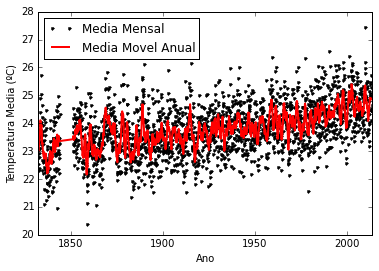

In [5]:
plt.figure()
plt.plot(data_mensal, temperatura_mensal, '.k', label = 'Media Mensal')
plt.plot(data_anual, temperatura_anual, '-r', label = 'Media Movel Anual', linewidth = 2)
plt.xlabel('Ano')
plt.xlim(1832, 2014)
plt.ylabel('Temperatura Media (ºC)')
plt.ylim(20, 28)
plt.legend(loc='upper left', fontsize='large')

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

In [8]:
temperatura_media = []
for i in range(0,len(data_mensal),1):
    temperatura_média.append(math.floor(data_mensal[i]))

In [9]:
temperatura_media_anual = []
lista = []
for i in range(0,len(data_mensal),1):
    t = 0
    if i + 11 < len(data_mensal) and math.floor(data_mensal[i]) == math.floor (data_mensal[i + 11]):
        for j in range (0,12,1):
            t = (temperatura_mensal[i + j])/12 + t
        lista.append (math.floor(data_mensal[i]))
        temperatura_media_anual.append(t)
print(temperatura_media_anual, lista)

[23.930916666666665, 23.3745, 22.835833333333337, 22.83725, 22.35125, 22.662750000000003, 22.626500000000004, 23.21366666666667, 23.1535, 23.273833333333336, 23.4785, 23.5425, 23.92775, 23.7865, 23.97541666666667, 22.835083333333337, 23.303666666666665, 22.64016666666667, 22.88833333333334, 23.858666666666668, 23.17625, 22.952916666666667, 22.92216666666667, 23.006416666666667, 22.980750000000004, 23.021749999999997, 23.197750000000006, 24.25691666666667, 24.290583333333334, 24.16916666666667, 23.86966666666667, 23.753, 23.923000000000002, 23.383250000000004, 22.61983333333334, 23.256833333333336, 23.66833333333334, 24.3445, 22.912833333333335, 23.886083333333332, 23.355583333333335, 22.781166666666667, 22.863249999999997, 22.840250000000005, 23.611666666666665, 23.053833333333333, 23.350583333333336, 23.739666666666672, 24.120000000000005, 23.594333333333335, 23.568916666666667, 23.375916666666672, 22.678416666666664, 23.577333333333335, 23.279833333333336, 23.314500000000002, 23.3876

In [10]:
for i in range (0, len(data_anual),12):
    print (i)

0
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
240
252
264
276
288
300
312
324
336
348
360
372
384
396
408
420
432
444
456
468
480
492
504
516
528
540
552
564
576
588
600
612
624
636
648
660
672
684
696
708
720
732
744
756
768
780
792
804
816
828
840
852
864
876
888
900
912
924
936
948
960
972
984
996
1008
1020
1032
1044
1056
1068
1080
1092
1104
1116
1128
1140
1152
1164
1176
1188
1200
1212
1224
1236
1248
1260
1272
1284
1296
1308
1320
1332
1344
1356
1368
1380
1392
1404
1416
1428
1440
1452
1464
1476
1488
1500
1512
1524
1536
1548
1560
1572
1584
1596
1608
1620
1632
1644
1656
1668
1680
1692
1704
1716
1728
1740
1752
1764
1776
1788
1800
1812
1824
1836
1848
1860
1872
1884
1896
1908
1920
1932
1944
1956
1968
1980
1992
2004
2016
2028
2040
2052
2064
2076


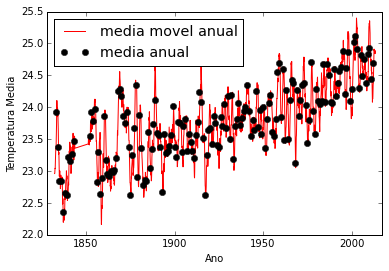

In [11]:
plt.figure() 
plt.plot(data_anual, temperatura_anual, '-r', label = 'media movel anual') 
plt.plot(lista,temperatura_media_anual, 'ok', label = 'media anual') 
plt.xlabel("Ano")
plt.xlim(1828, 2017) 
plt.ylabel("Temperatura Media") 
plt.legend(loc='upper left', fontsize='x-large') 

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).